69


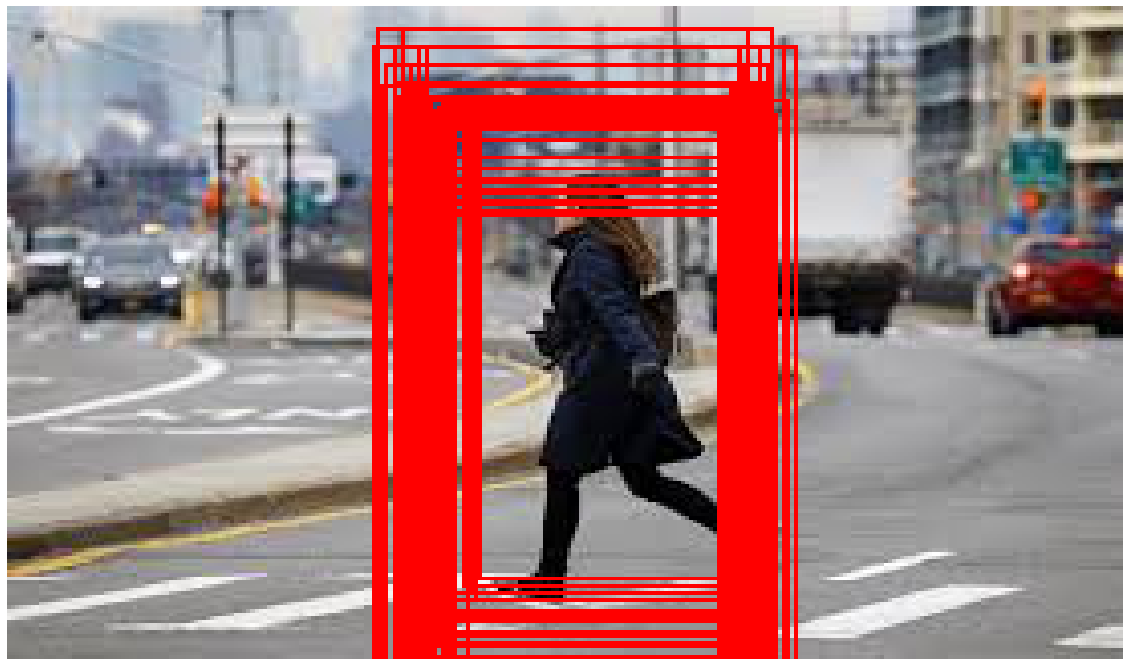

(<matplotlib.image.AxesImage at 0x7fd8e44aeda0>,
 (-0.5, 274.5, 182.5, -0.5),
 None)

In [15]:
import numpy as np
import cv2
import matplotlib.pylab as pylab
img = cv2.imread("./images/input/ped2.jpg")
# create HOG descriptor using default people (pedestrian) detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
# run detection, using a spatial stride of 4 pixels (horizontal and vertical), a scale stride of 1.02, and # zero grouping of rectangles (to demonstrate that HOG will detect at potentially multiple places in the 
# scale pyramid)
(foundBoundingBoxes, weights) = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.02, finalThreshold=0)
print(len(foundBoundingBoxes)) # number of boundingboxes
# 357
# copy the original image to draw bounding boxes on it for now, as we'll use it again later
imgWithRawBboxes = img.copy()
for (hx, hy, hw, hh) in foundBoundingBoxes:
    cv2.rectangle(imgWithRawBboxes, (hx, hy), (hx + hw, hy + hh), (0, 0, 255), 1)
pylab.figure(figsize=(20, 12))
imgWithRawBboxes = cv2.cvtColor(imgWithRawBboxes, cv2.COLOR_BGR2RGB)
pylab.imshow(imgWithRawBboxes, aspect='auto'), pylab.axis('off'), pylab.show()

69 1


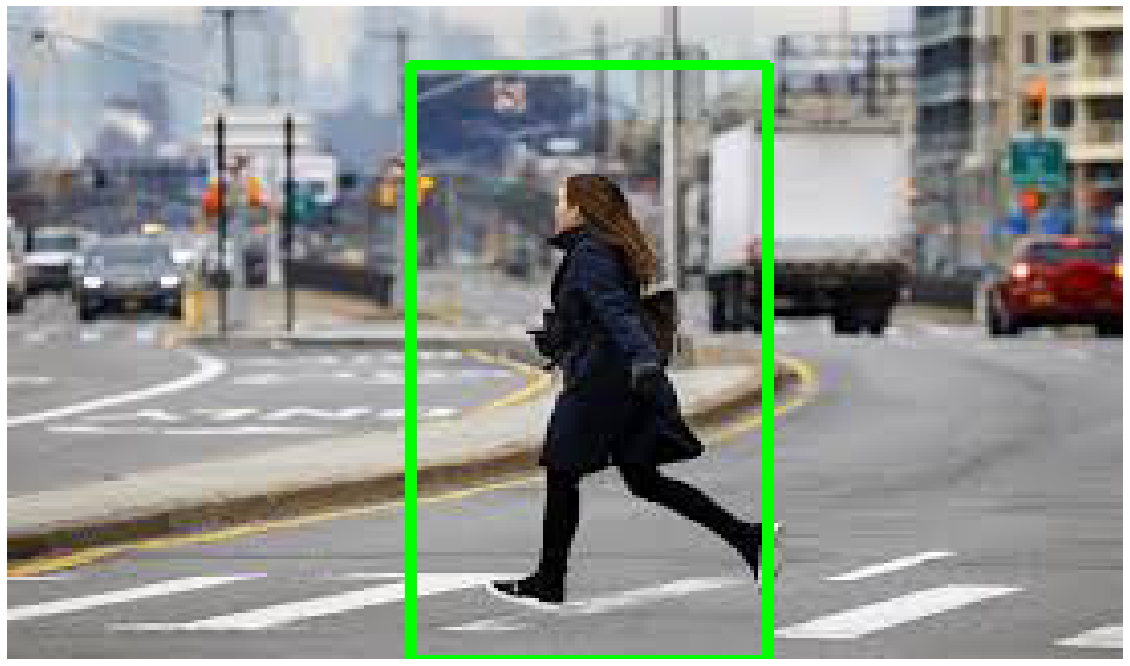

(<matplotlib.image.AxesImage at 0x7fd8e44a45f8>,
 (-0.5, 274.5, 182.5, -0.5),
 None)

In [16]:
from imutils.object_detection import non_max_suppression
# convert our bounding boxes from format (x1, y1, w, h) to (x1, y1, x2, y2)
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in foundBoundingBoxes])
# run non-max suppression on these based on an overlay op 65%
nmsBoundingBoxes = non_max_suppression(rects, probs=None, overlapThresh=0.65)
print(len(rects), len(nmsBoundingBoxes))
# 357 1
# draw the final bounding boxes
for (x1, y1, x2, y2) in nmsBoundingBoxes:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
pylab.figure(figsize=(20, 12)) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pylab.imshow(img, aspect='auto'), pylab.axis('off'), pylab.show()